# Análise preliminar dos dados brutos do BOP

In [2]:
import pandas as pd 
bop = pd.read_csv('BOP.csv')

### Quais colunas nós temos?

In [3]:
bop.columns

Index(['COUNTRY', 'BOP_ACCOUNTING_ENTRY', 'INDICATOR', 'UNIT', 'FREQUENCY',
       'TIME_PERIOD', 'value', 'index'],
      dtype='object')

### Quais são os tipode de dados de cada coluna?

In [4]:
display(bop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180804 entries, 0 to 180803
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   COUNTRY               180804 non-null  object 
 1   BOP_ACCOUNTING_ENTRY  180804 non-null  object 
 2   INDICATOR             180804 non-null  object 
 3   UNIT                  180804 non-null  object 
 4   FREQUENCY             180804 non-null  object 
 5   TIME_PERIOD           180804 non-null  object 
 6   value                 180804 non-null  float64
 7   index                 0 non-null       float64
dtypes: float64(2), object(6)
memory usage: 11.0+ MB


None

Objetos do tipo object indicam que eles podem ser de qualquer tipo, isso não é bom. É necessário ser tratado da bronze para a silver!

### Qual o shape da nossa tabela (linhas x colunas)?

In [23]:
bop.shape

(180804, 8)

*Resumo Inicial*:

É uma tabela que possui 180.804 linhas e 8 colunas, sendo elas:
1. 'COUNTRY'
2. 'BOP_ACCOUNTING_ENTRY'
3. 'INDICATOR'
4. 'UNIT'
4. 'FREQUENCY'
5. 'TIME_PERIOD'
6. 'value',
7. 'index'

- Além disso, podemos ver que a coluna 'index' todos os itens são nulos e sobre os tipos de dados,

    - Todas as colunas são do tipo object exceto 'value' e 'index' que são do tipo float


### Percentual de valores nulos por país

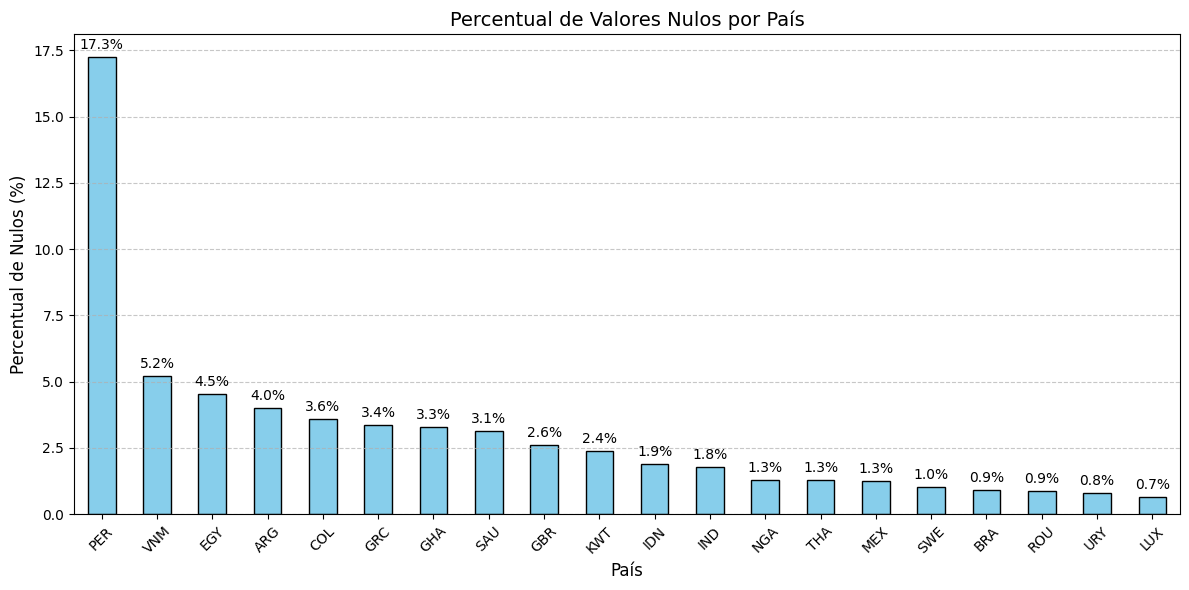

In [15]:
import matplotlib.pyplot as plt

nulos = bop.replace(0, None) # Trocando os valores zero por nulo

percentual_nulos = (
    nulos.groupby('COUNTRY')['value']
    .apply(lambda x: x.isnull().mean() * 100)
    .sort_values(ascending=False)
    .head(20)
)


# Adicionando os valores no topo de cada barra
for index, value in enumerate(percentual_nulos):
    plt.text(index, value + 0.3, f'{value:.1f}%', ha='center', fontsize=10)


percentual_nulos.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Percentual de Valores Nulos por País', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Percentual de Nulos (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Percentual de nulos por país e indicador

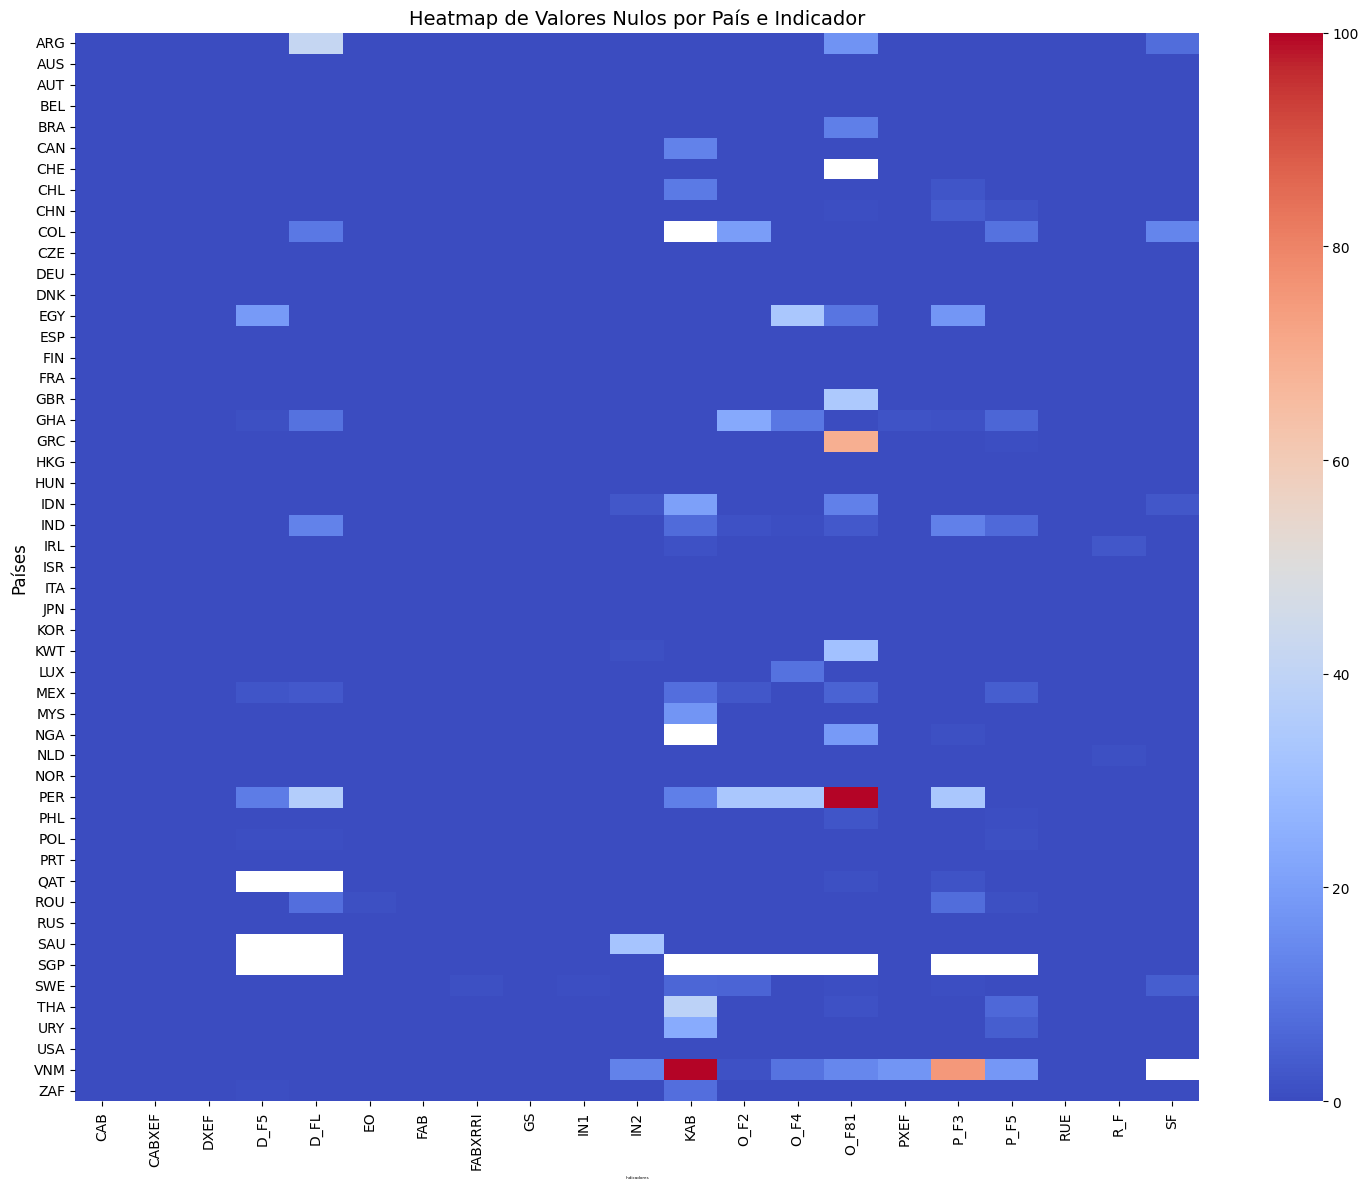

In [ ]:
import numpy as np 
import seaborn as sns


percentual_nulos = (
    nulos.groupby(['COUNTRY', 'INDICATOR'])['value']
    .apply(lambda x: x.isnull().mean() * 100)
    .sort_values(ascending=False)
)
# Reshape para formato de matriz
pivot_nulos = percentual_nulos.reset_index().pivot(index='COUNTRY', columns='INDICATOR', values='value')

# Plotando o heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(pivot_nulos, cmap='coolwarm', annot=False, cbar=True)
plt.title('Heatmap de Valores Nulos por País e Indicador', fontsize=14)
plt.xlabel('Indicadores', fontsize=3)
plt.ylabel('Países', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Análise descritiva dos dados

- O método describe originalmente faz a análise apenas das colunas numéricas:

In [24]:
bop.describe()

,value,index
count,1.808040e+05,0.0
mean,8.002791e+09,NaN
std,4.131888e+10,NaN
min,-6.730551e+11,NaN
25%,-2.344420e+08,NaN
50%,5.409171e+08,NaN
75%,4.696585e+09,NaN
max,1.158498e+12,NaN


- Aqui teremos uma análise descritiva das colunas que não são numéricas

In [25]:
bop.describe(exclude='number')

,COUNTRY,BOP_ACCOUNTING_ENTRY,INDICATOR,UNIT,FREQUENCY,TIME_PERIOD
count,180804,180804,180804,180804,180804,180804
unique,51,7,21,1,1,102
top,KOR,L_NIL_T,IN1,USD,Q,2021-Q4
freq,3978,41145,14430,180804,180804,1938


### Análise do describe

Aqui podemos decobrir algumas informações importantes:

- Estamos com dados de 51 países
- Tem 21 indicadores diferentes sendo analisados ao todo
- Temos 7 BOP_ACCOUNTING_ENTRY
- Estamos com dados de frequência trimestral
- E uma única unidade para valor que é USD

- Não podemos chegar em nenhuma conclusão sobre os valores numéricos, pois como temos 21 indicadores, os valores variam muito de acordo com o indicador


# O que mais podemos descobrir?

1. Quais são esses países?
2. Quais são esses 21 indicadores?
3. Quais são os 7 BOP_ACCOUNTING_ENTRY, e o que é isso?
4. Todos os países tem os 21 indicadores com valores não nulos?
5. Qual o menor período e qual o maior? Qual é o intervalo (período) que estamos analisando?
6. Como fica o gráfico da comparação dos países com cada indicador?

#### 1. Quais são os países?

In [26]:
bop.COUNTRY.unique()

array(['USA', 'CHN', 'DEU', 'JPN', 'GBR', 'FRA', 'ITA', 'IND', 'CAN',
       'AUS', 'KOR', 'ESP', 'NLD', 'IRL', 'CHE', 'LUX', 'SWE', 'DNK',
       'FIN', 'POL', 'AUT', 'BEL', 'CZE', 'HUN', 'ROU', 'PRT', 'GRC',
       'BRA', 'MEX', 'ARG', 'COL', 'CHL', 'PER', 'URY', 'SGP', 'HKG',
       'THA', 'MYS', 'VNM', 'IDN', 'PHL', 'SAU', 'QAT', 'KWT', 'ISR',
       'NOR', 'RUS', 'ZAF', 'EGY', 'NGA', 'GHA'], dtype=object)

#### 2. Quais são os indicadores?

In [27]:
bop.INDICATOR.unique()

array(['CAB', 'CABXEF', 'KAB', 'FAB', 'FABXRRI', 'EO', 'SF', 'GS', 'IN1',
       'IN2', 'DXEF', 'D_F5', 'D_FL', 'PXEF', 'P_F5', 'P_F3', 'O_F4',
       'O_F2', 'O_F81', 'RUE', 'R_F'], dtype=object)

#### 3. Quais são os 7 BOP_ACCOUNTING_ENTRY, e o que é isso?

- BOP_ACCOUNTING_ENTRY é o tipo de entrada contábil: crédito, débito, líquido, ativos, passivos (vide seção 3)

In [28]:
bop.BOP_ACCOUNTING_ENTRY.unique()

array(['NETCD_T', 'NNAFANIL_T', 'CD_T', 'DB_T', 'L_NIL_T', 'A_NFA_T',
       'A_T'], dtype=object)

| Indicador  | Nome (EN)                              | Nome (PT)                                | Interpretação                             |
| ---------- | -------------------------------------- | ---------------------------------------- | ----------------------------------------- |
| **DXEF**   | Direct Investment excl. Exceptional    | Investimento Direto (sem exceções)       | IED total.                                |
| **D\_F5**  | Direct Investment – Equity             | Investimento Direto – Ações              | Participação acionária (capital estável). |
| **D\_FL**  | Direct Investment – Debt               | Investimento Direto – Dívida             | Empréstimos intragrupo.                   |
| **PXEF**   | Portfolio Investment excl. Exceptional | Investimento em Portfólio (sem exceções) | Títulos financeiros (volátil).            |
| **P\_F5**  | Portfolio Equity                       | Portfólio – Ações                        | Ações/fundos.                             |
| **P\_F3**  | Portfolio Debt                         | Portfólio – Dívida                       | Títulos de dívida.                        |
| **O\_F4**  | Other Investment – Loans               | Outros Investimentos – Empréstimos       | Empréstimos bancários/organismos.         |
| **O\_F2**  | Other Investment – Currency & Deposits | Outros Investimentos – Moeda/Depósitos   | Variações de caixa bancário.              |
| **O\_F81** | Trade Credit                           | Crédito Comercial                        | Fornecedores.                             |

#### 3.1 Qual dos BOP_ACCOUNTING_ENTRY possui mais resultados?

In [29]:
import numpy as np 


# 102 trimestres x 55 países = 5610
bop_null = bop.replace(0, np.nan) # Trocando os valores zero por nulo

for indicador in bop_null.INDICATOR.unique():
    bop_filtrado = bop[bop.INDICATOR == indicador]
    print(f"Indicador {indicador}")
    for bop_ac in bop_filtrado['BOP_ACCOUNTING_ENTRY'].unique():
        bop_filtrado_bop = bop_filtrado[bop_filtrado['BOP_ACCOUNTING_ENTRY'] == bop_ac]['value']
        print(f"Quantidade do bop_ac {bop_ac}: {bop_filtrado_bop.count()}")



Indicador CAB
Quantidade do bop_ac NETCD_T: 4802
Indicador CABXEF
Quantidade do bop_ac NETCD_T: 4810
Indicador KAB
Quantidade do bop_ac NETCD_T: 4376
Indicador FAB
Quantidade do bop_ac NNAFANIL_T: 4802
Indicador FABXRRI
Quantidade do bop_ac NNAFANIL_T: 4789
Indicador EO
Quantidade do bop_ac NETCD_T: 4802
Indicador SF
Quantidade do bop_ac CD_T: 4576
Quantidade do bop_ac DB_T: 4586
Quantidade do bop_ac NETCD_T: 4586
Indicador GS
Quantidade do bop_ac CD_T: 4810
Quantidade do bop_ac DB_T: 4810
Quantidade do bop_ac NETCD_T: 4810
Indicador IN1
Quantidade do bop_ac CD_T: 4810
Quantidade do bop_ac DB_T: 4810
Quantidade do bop_ac NETCD_T: 4810
Indicador IN2
Quantidade do bop_ac CD_T: 4810
Quantidade do bop_ac DB_T: 4789
Quantidade do bop_ac NETCD_T: 4810
Indicador DXEF
Quantidade do bop_ac L_NIL_T: 4802
Indicador D_F5
Quantidade do bop_ac A_NFA_T: 4385
Quantidade do bop_ac L_NIL_T: 4538
Indicador D_FL
Quantidade do bop_ac A_NFA_T: 4338
Quantidade do bop_ac L_NIL_T: 4450
Indicador PXEF
Quantidad

#### Abaixo, teremos o gráfico da quantidade de cada BOP_ACCOUNTING_ENTRY para cada indicador para podermos ver a distribuição

In [30]:
import plotly.express as px


# 1) Agrupar e contar
counts = (
    bop_null
      .groupby(['INDICATOR', 'BOP_ACCOUNTING_ENTRY'])
      .agg(count=('value','count'))
      .reset_index()
)

fig = px.bar(
    counts,
    x="INDICATOR",
    y="count",
    color="BOP_ACCOUNTING_ENTRY",
    barmode="group",
    height=600,
    text="count"
)

# Scroll horizontal (x-axis com range + modo interativo)
fig.update_layout(
  xaxis=dict(
    rangeslider=dict(visible=True),  # adiciona slider
    type="category"
  ),
  height=700  # aumenta o tamanho da figura
)
fig.update_traces(
  textposition="outside",
  # textangle=45,
  textfont_size=250  # aumenta o tamanho do texto
)
fig.show()



#### Análise do gráfico:


1. **Indicadores com apenas 1 `BOP_ACCOUNTING_ENTRY` (ex: apenas `NETCD_T`)**

   * **Exemplos**: `CAB`, `CABXEF`, `EO`, `FAB`, `FABXRRI`, `RUE`, `R_F`
   * **Interpretação**: são indicadores **sintéticos** ou de **saldo final**, como:

     * **Saldo da Conta Corrente** (`CAB`)
     * **Conta Financeira Agregada** (`FAB`)
     * **Ativos de Reserva** (`R_F`)
   * Faz sentido que tenham **apenas o saldo líquido** (`NETCD_T`), pois eles representam o “placar” e não o fluxo bruto de entrada/saída.

2. **Indicadores com 2 `BOP_ACCOUNTING_ENTRY` (normalmente `CD_T` e `DB_T`)**

   * **Exemplos**: `SF`, `GS`, `IN1`, `IN2`, `P_F3`, `P_F5`, `O_F81`
   * **Interpretação**:

     * Representam **contas de fluxo** que têm **entradas (créditos)** e **saídas (débitos)** separadas.
     * Ex: no **Saldo Comercial (SF)** ou **Rendas Primárias (IN1)**, é importante ver **exportações vs. importações**, ou **juros recebidos vs. pagos**.

3. **Indicadores com `A_NFA_T` e `L_NIL_T`**

   * **Exemplos**: `DXEF`, `D_F5`, `D_FL`, `PXEF`, `P_F3`, `P_F5`, `O_F2`, `O_F4`
   * **Interpretação**:

     * São **componentes da Conta Financeira**, mostrando **ativos comprados (A_NFA_T)** e **passivos emitidos (L_NIL_T)**.
     * Exemplo: se um país emite dívida externa (`L_NIL_T` ↑), isso gera entrada de capital; se compra ativos no exterior (`A_NFA_T` ↑), é saída de moeda.

4. **Indicadores com `NNAFANIL_T`**

   * **Exemplo**: `FABXRRI`, `D_FL`
   * **Interpretação**:

     * Esses usam o **saldo líquido** entre aquisição de ativos e emissão de passivos.
     * Representa diretamente a “posição líquida” de fluxo de capitais.

5. **Indicadores com `A_T` e `L_T`**

   * **Exemplo**: `R_F`
   * **Interpretação**:

     * Representa **estoques brutos**: total de ativos (`A_T`) ou passivos (`L_T`).
     * Útil para **níveis absolutos** ao invés de fluxos.



#### 5. Qual o menor período e qual o maior? Qual é o intervalo (período) que estamos analisando?



In [31]:
print(bop_null['TIME_PERIOD'].min())
print(bop_null['TIME_PERIOD'].max())

2000-Q1
2025-Q2


Estamos trabalhando com dados do período do primeiro trismestre de 2000 até o segundo trimestre de 2025!

#### 6. Como fica o gráfico da comparação dos países com cada indicador?



### **Critérios que usarei para selecionar os 7 mais interessantes**:

1. **Relevância macroeconômica**: são chaves para entender o comportamento externo do país (comércio, investimentos, reservas).
2. **Riqueza de informações**: possuem mais de um tipo de lançamento (`CD_T`, `DB_T`, etc.), permitindo decomposição.
3. **Utilidade para análises de políticas econômicas ou crises externas**.
4. **Possibilidade de gerar insights sobre fluxo de capitais ou solvência externa**.

---

### **Os 7 indicadores mais interessantes para analisar**

| Indicador | Nome                                     | Por que é interessante?                                                                                                    |
| --------- | ---------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| **CAB**   | Saldo da Conta Corrente                  | É o **placar externo** de um país. Indica se o país está se endividando ou acumulando reservas.                            |
| **SF**    | Saldo Comercial                          | Principal componente do CAB. Impactado por commodities, câmbio, exportações e importações.                                 |
| **IN1**   | Rendas Primárias                         | Crucial para entender **juros da dívida externa**, remessas de lucros. Sensível a taxas de juros globais.                  |
| **DXEF**  | Investimento Direto (sem exceções)       | Mostra **confiança dos investidores estrangeiros** — investimentos produtivos, fábricas, empresas.                         |
| **PXEF**  | Investimento em Portfólio (sem exceções) | Reflete fluxos mais **voláteis e especulativos** — títulos de dívida e ações. Forte sinal de instabilidade se muda rápido. |
| **O_F2**  | Moeda e Depósitos                        | Capta fluxos rápidos de entrada/saída de moeda. Pode indicar **fuga de capitais** ou boom de crédito.                      |
| **R_F**   | Ativos de Reservas                       | Mostra o **estoque de reservas internacionais**. Crucial para analisar liquidez externa e política cambial.                |


### **Comparativo com as principais potências**

| País    | Nome           | Por que é interessante?                                                                                                 |
| ------- | -------------- | ----------------------------------------------------------------------------------------------------------------------- |
| **USA** | Estados Unidos | Maior economia do mundo. Referência global para moeda (USD), política monetária e fluxos financeiros internacionais.    |
| **CHN** | China          | Principal economia emergente, maior exportador mundial e rival estratégico dos EUA no comércio global.                  |
| **DEU** | Alemanha       | Maior economia da Europa. Potência industrial e exportadora, importante para o equilíbrio da zona do euro.              |
| **JPN** | Japão          | Terceira maior economia mundial. Forte em reservas, exportações de alta tecnologia e investimentos externos.            |
| **IND** | Índia          | País emergente com crescimento rápido. Destaque em serviços, tecnologia e fluxo de remessas.                            |
| **GBR** | Reino Unido    | Centro financeiro global. Permite observar efeitos de abertura comercial, política cambial e volatilidade pós-Brexit.   |
| **BRA** | Brasil         | Principal economia da América Latina. Forte dependência de commodities e importante para entender dinâmicas emergentes. |




In [32]:
indicadores_interessantes = [
    "CAB",     # Saldo da Conta Corrente
    "SF",      # Saldo Comercial
    "IN1",     # Rendas Primárias
    "DXEF",    # Investimento Direto (sem exceções)
    "PXEF",    # Investimento em Portfólio (sem exceções)
    "O_F2",    # Moeda e Depósitos
    "R_F"      # Ativos de Reservas
]

principais_potencias = [
    "USA",  # Estados Unidos
    "CHN",  # China
    "DEU",  # Alemanha
    "JPN",  # Japão
    "IND",  # Índia
    "GBR",  # Reino Unido
    "BRA"   # Brasil
]



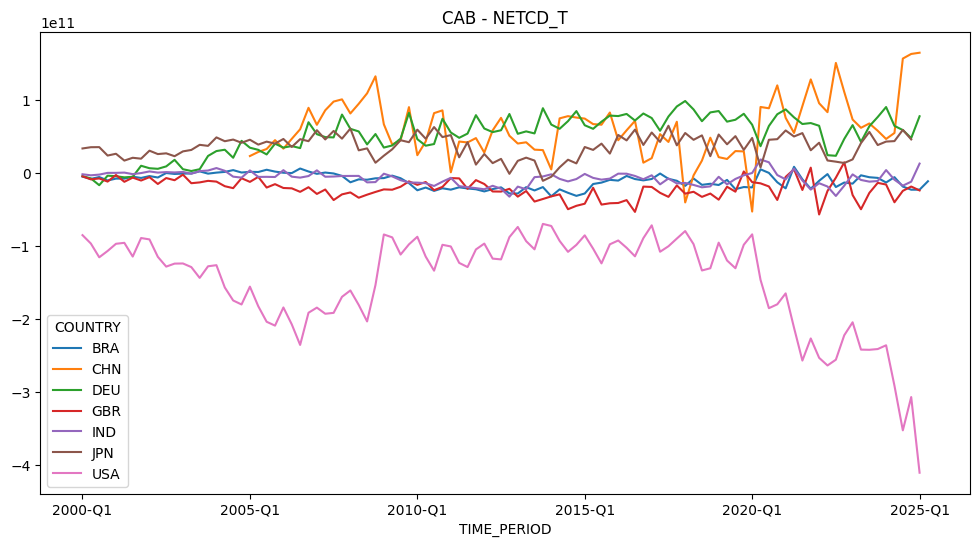

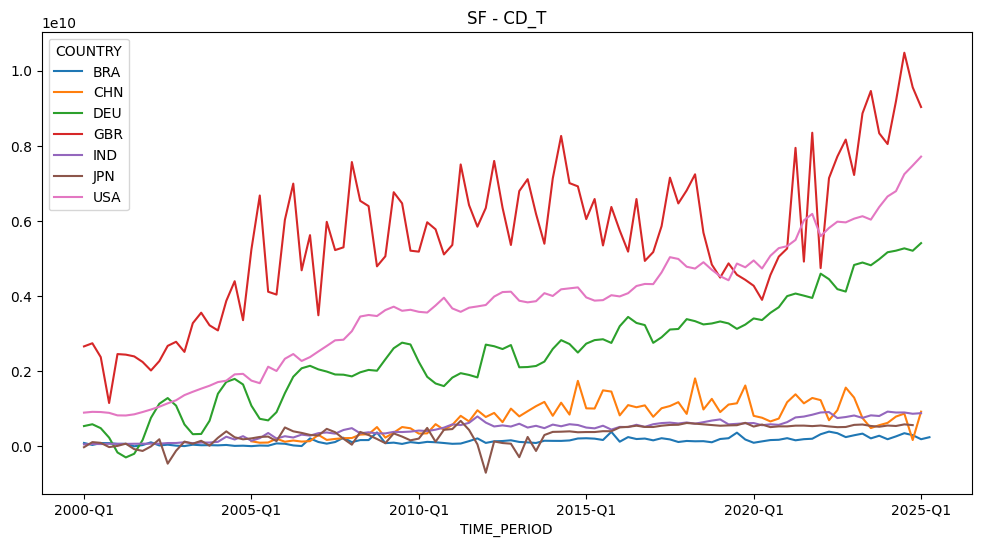

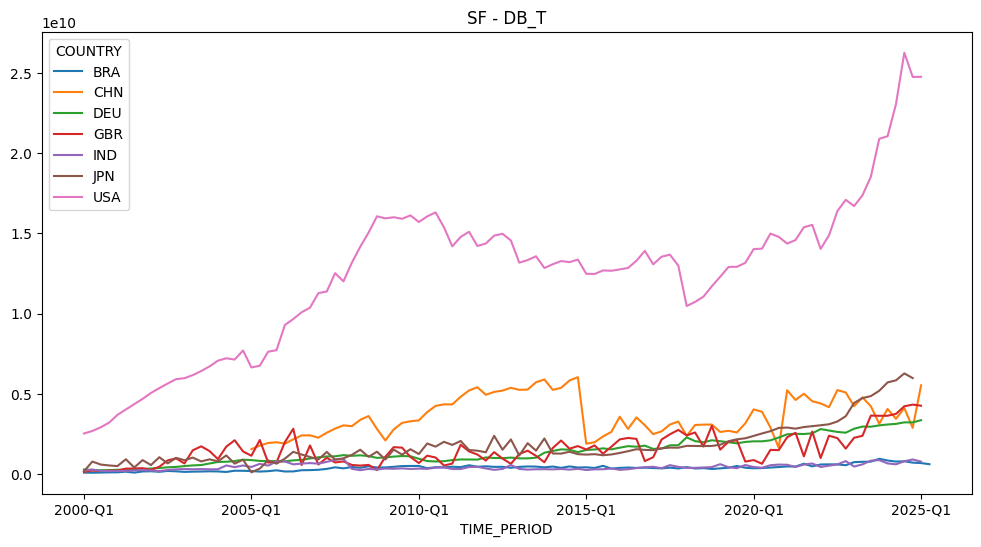

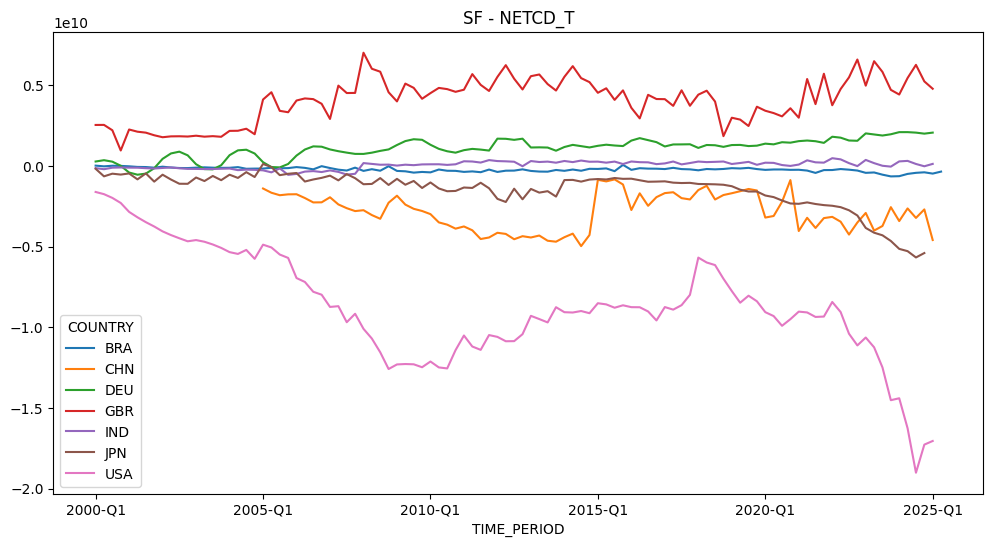

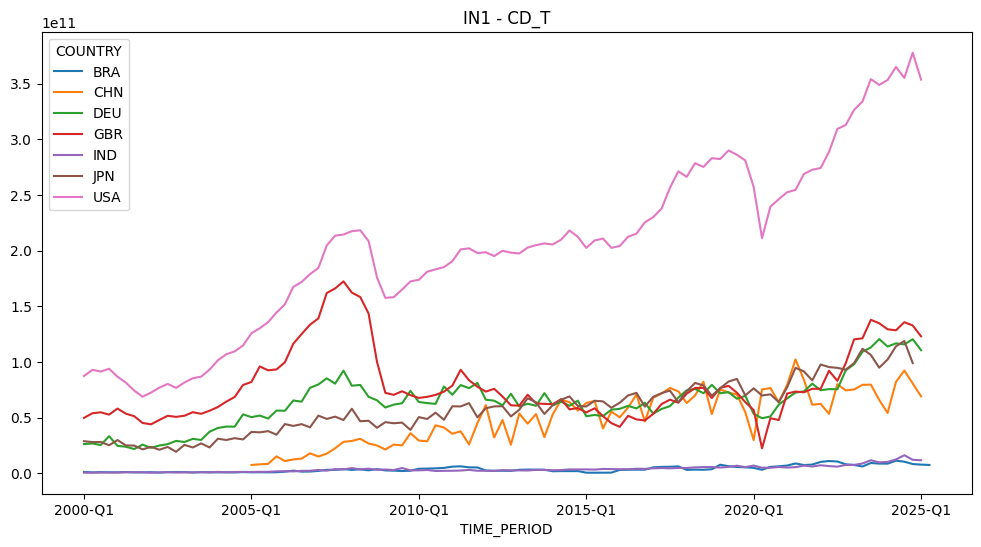

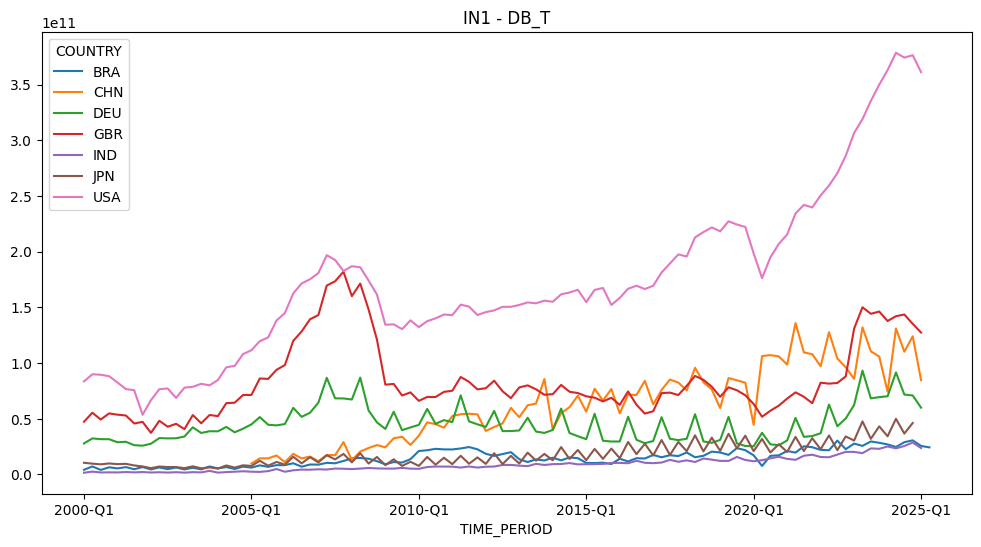

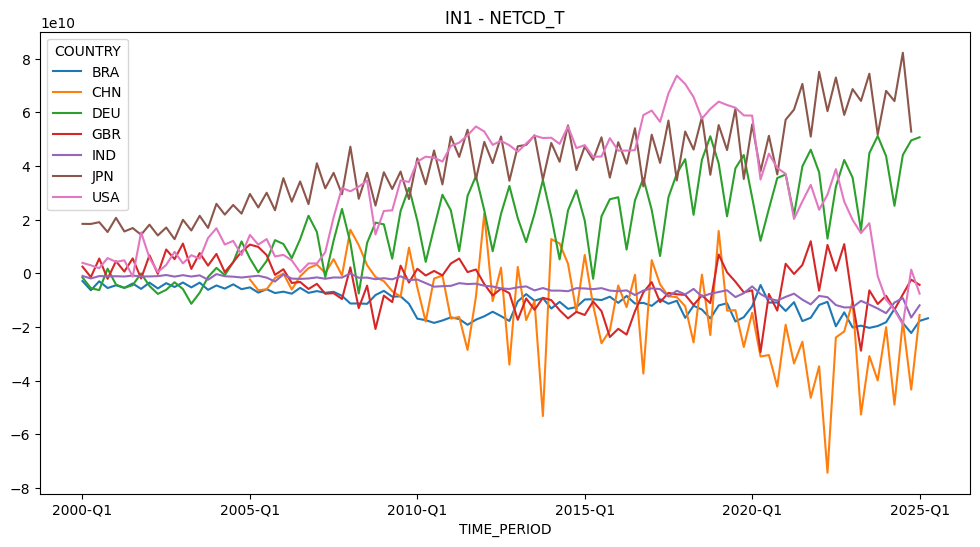

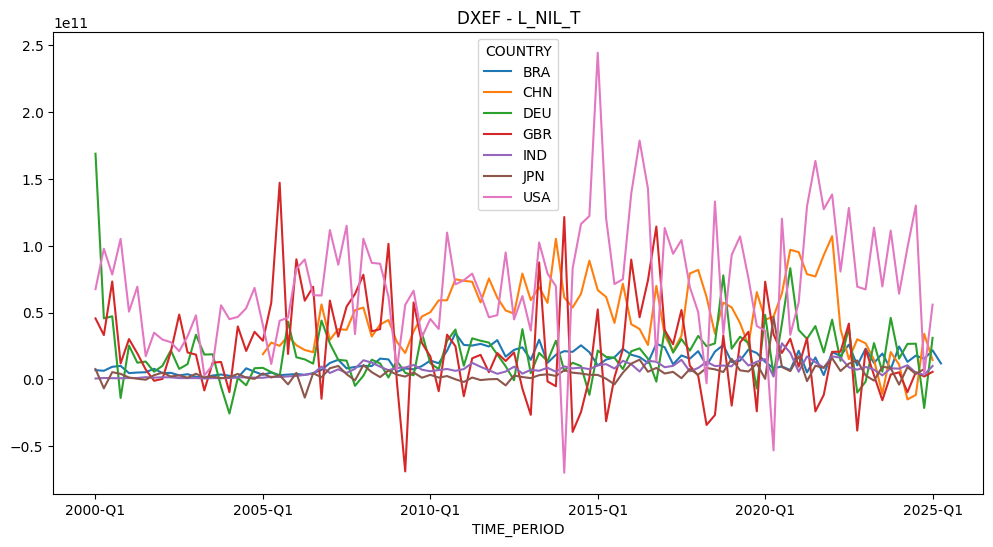

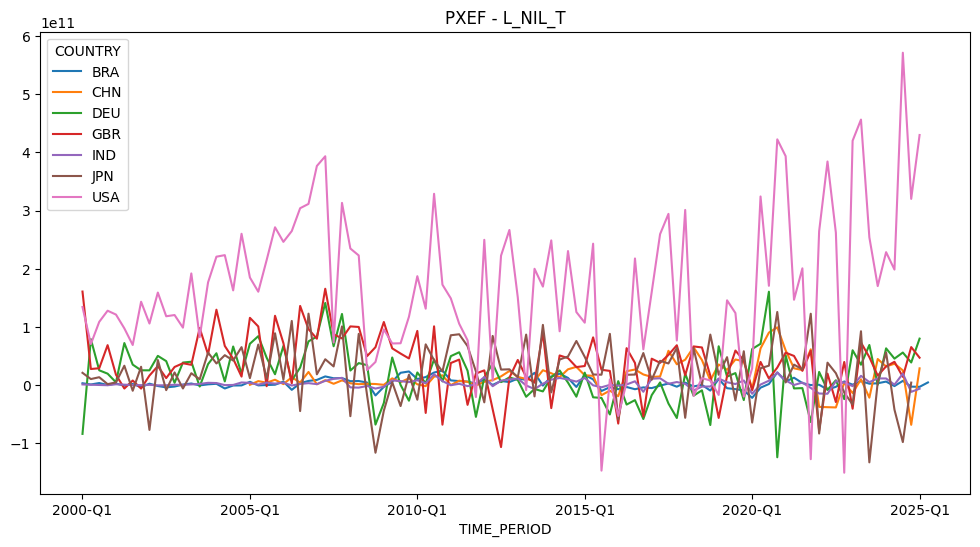

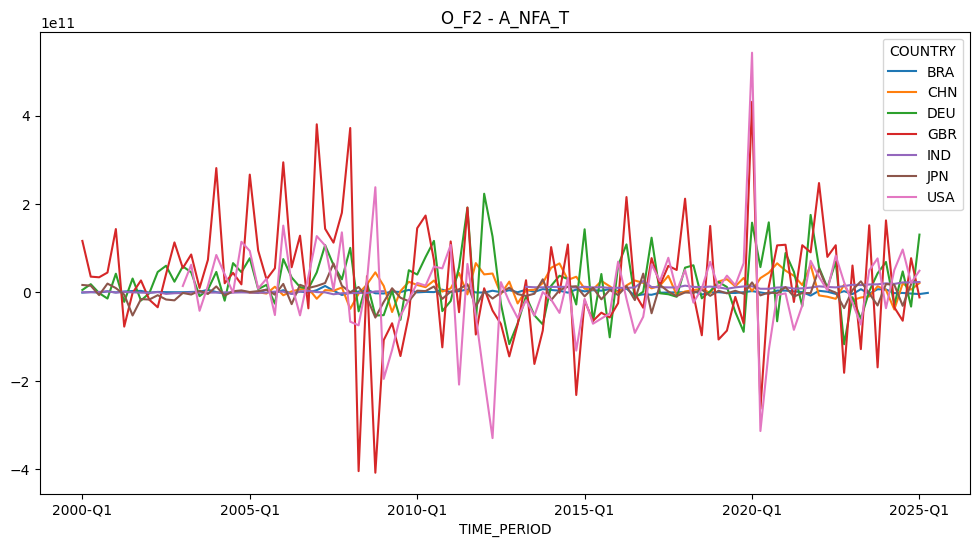

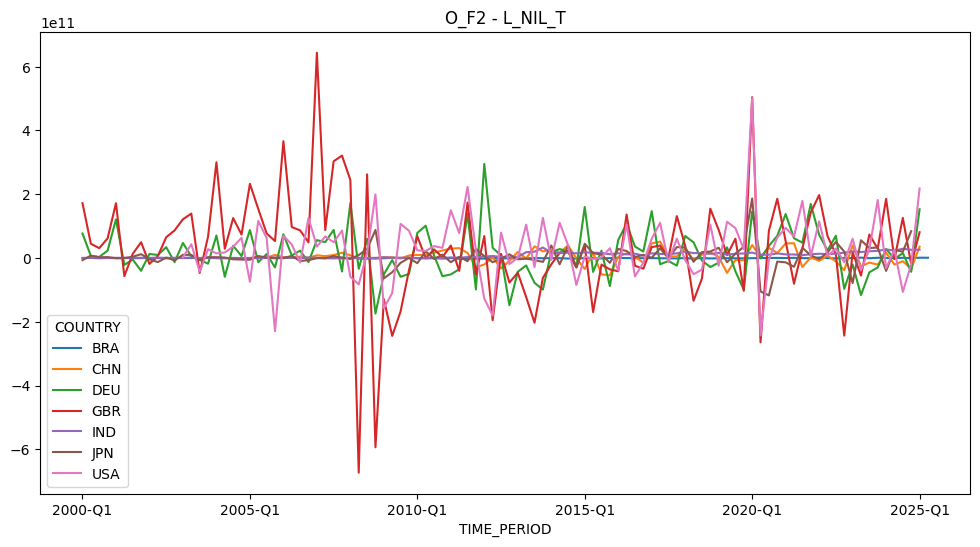

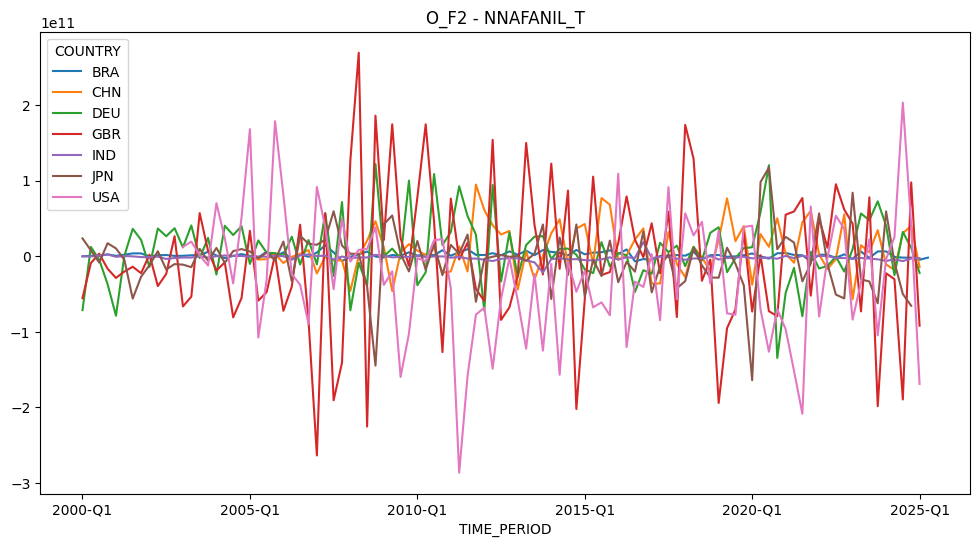

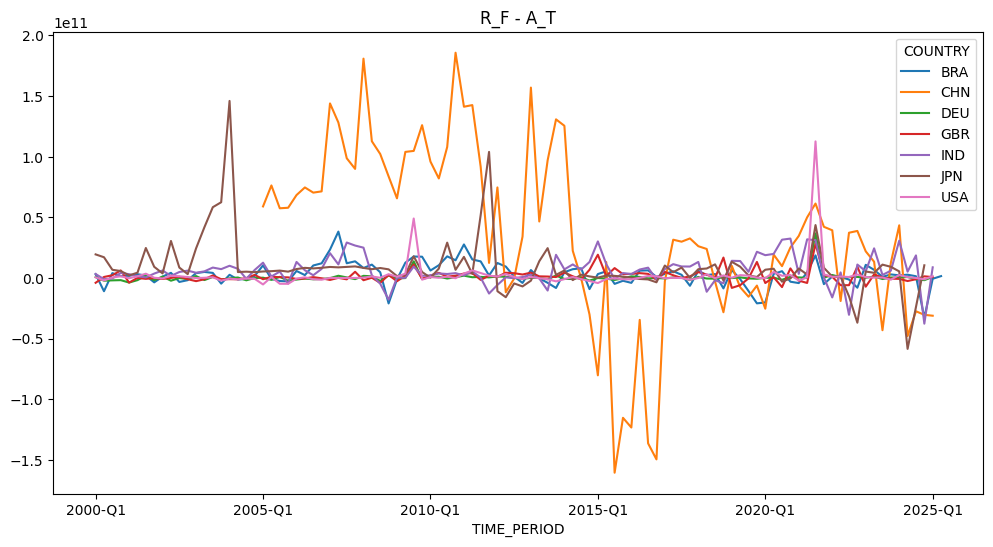

In [33]:
for indicador in indicadores_interessantes:
    df_filtrado = bop_null[(bop_null['INDICATOR']== indicador) & (bop_null['COUNTRY'].isin(principais_potencias))]

    if len(df_filtrado.BOP_ACCOUNTING_ENTRY.unique()) == 1:
        # display(teste['TIME_PERIOD'])
        pivot_filtrado = df_filtrado.pivot_table(
            values='value',
            index='TIME_PERIOD',
            columns='COUNTRY',
        )
        nome_acc = df_filtrado.BOP_ACCOUNTING_ENTRY.unique()[0]
        nome = f"{indicador} - {nome_acc}"

        pivot_filtrado.plot(figsize=(12,6), title=nome)
    else:
        for bop_acc_ent in df_filtrado.BOP_ACCOUNTING_ENTRY.unique():
            df_filtrado_bopAc = df_filtrado[df_filtrado.BOP_ACCOUNTING_ENTRY == bop_acc_ent]

            pivot_filtrado = df_filtrado_bopAc.pivot_table(
                values='value',
                index='TIME_PERIOD',
                columns='COUNTRY',
            )

            nome_acc = df_filtrado_bopAc.BOP_ACCOUNTING_ENTRY.unique()[0]
            nome = f"{indicador} - {nome_acc}"
            
            pivot_filtrado.plot(figsize=(12,6), title=nome)




## **Análise dos resultados**


### **1. CAB - CD_T** (Créditos da Conta Corrente)



* **China e Alemanha** lideram em **créditos da conta corrente**, sinalizando **superávits recorrentes**. Isso reflete sua força exportadora.
* **Estados Unidos** têm déficit crescente, o que mostra **dependência estrutural de financiamento externo**.
* **Brasil e Índia** mantêm nível modesto e estável — comportamento típico de emergentes com economias abertas.

**Interpretativo**: Exportadores líquidos (CHN, DEU) geram acúmulo de reservas. Já EUA atua como consumidor global.



### **2. SF - CD_T** (Créditos do Saldo Comercial)



* **Alemanha (DEU)** e **EUA (USA)** mostram **crescimento constante nas exportações**, reforçando seu papel como produtores globais.
* **Reino Unido (GBR)** tem comportamento muito volátil: possível exposição a choques de comércio e BREXIT.
* **Brasil** é estável, mas com crescimento modesto — mostra **dependência de commodities** com pouca diversificação.

**CHN e IND** aparecem com crescimento moderado → reflexo de integração em cadeias globais de valor.



### **3. SF - DB_T** (Débitos do Saldo Comercial)



* **EUA** lidera as **importações**, mostrando forte consumo doméstico.
* **China** mostra aumento de importações até 2015, seguido por queda → reflexo de **reposição de cadeia local** ou medidas protecionistas.
* **Japão** mostra estabilidade com leve alta recente.

A diferença entre SF-CD_T e SF-DB_T permite avaliar o saldo comercial líquido.



### **4. SF - NETCD_T** (Saldo Comercial Líquido)



* Superávit em destaque: **Reino Unido e Alemanha** sustentam saldos comerciais líquidos positivos por longos períodos, com tendência de alta — sinal de competitividade externa consistente.
* Déficit em destaque: **Estados Unidos** exibem deterioração acentuada e persistente do saldo; **Japão** vira para déficit após 2014, reforçando a dependência de importações (especialmente energia).

* **Brasil** tem saldo positivo modesto → estabilidade com pouca elasticidade ao câmbio.

CHN mostra uma **queda acentuada no saldo comercial líquido** nos últimos anos — sinal de aumento de importações ou perda de fôlego exportador.



### **5. IN1 - CD_T** (Recebimentos de Rendas Primárias)


* **EUA**: dominam o gráfico e aceleram forte após 2016; sinal de lucros externos elevados de multinacionais e grande estoque de ativos no exterior (recebem muito, embora paguem ainda mais no IN1_DB_T).
* **Reino Unido**: pico pré-2008 com queda abrupta na crise financeira e posterior normalização; reflete retração/reestruturação do setor financeiro.
* **Brasil e Índia**: baixos créditos e leve tendência de alta; pouca renda recebida do exterior — estoque de ativos fora ainda pequeno.

Interpretação: mostra quem **investe no mundo** e coleta lucros do exterior.



### **6. IN1 - DB_T** (Pagamentos de Rendas Primárias)



* **China, Reino Unido e Alemanha** mantêm estoques relevantes, mas em patamares significativamente menores, com oscilações e sem o mesmo ritmo de crescimento dos EUA.
* **EUA** paga muito, mas também recebe muito → país com forte posição líquida negativa em renda primária.

Um país com mais DB_T do que CD_T nesta conta sofre de **transferência líquida de renda para o exterior** (caso do Brasil).

Esse gráfico sugere que os EUA possuem uma **alta capacidade de investimento externo**, o que pode indicar forte presença de empresas e instituições americanas investindo em ativos no exterior — como ações, títulos e empresas estrangeiras. Isso pode refletir a robustez do sistema financeiro e o grau de globalização da economia americana.



### **7. IN1 - NETCD_T** (Saldo líquido de renda primária)



Esse gráfico mostra o **saldo líquido das rendas primárias (NETCD_T)**, ou seja, **quanto cada país está recebendo menos quanto está pagando em rendas primárias** (como juros, lucros e salários enviados/recebidos do exterior). O saldo positivo indica que o país **recebe mais do que paga**; o negativo, que **paga mais do que recebe**.


* **Japão e Alemanha** se destacam com **saldos líquidos consistentemente positivos e crescentes**, o que indica que são **grandes credores internacionais**, recebendo mais rendas do exterior (como juros e lucros sobre investimentos) do que pagando. Isso é típico de países com **fortes estoques de ativos externos**.

* **China e Brasil**, por outro lado, apresentam **saldos negativos**, com destaque para a China, que tem déficits expressivos e voláteis. Isso significa que **pagam mais ao exterior do que recebem**, o que pode estar relacionado ao alto volume de investimentos estrangeiros e remessas de lucros.





### **8. DXEF - NETCD_T** (Investimento Direto Líquido)

Representa o saldo líquido (crédito - débito) de Investimento Direto (IED), ou seja, valores positivos indicam que entrou mais investimento externo do que saiu (mais investidores estrangeiros investiram no país do que empresas locais investiram no exterior).

**Estados Unidos e China são os principais receptores líquidos de IED**:

* Ambos apresentam **saldos líquidos de IED elevados e consistentes**, com destaque para os EUA, especialmente entre **2010 e 2020**, com picos muito altos.
* A **China** também se destaca com fluxo positivo estável, sinal de forte atratividade para capital estrangeiro.

**Brasil, Índia e Japão com saldos mais modestos**:

* Esses países apresentam saldos líquidos relativamente **baixos** e **estáveis**, sem grandes picos. Isso pode indicar menor variação de entrada e saída de capital direto.

IED mostra **confiança estrutural** de longo prazo em uma economia.



### **9. R_F: NNAFANIL_T** 


Esse gráfico compara **dois movimentos financeiros importantes** dos países ao longo do tempo:

1. **NNAFANIL_T**: é como se fosse o “saldo do cofre internacional” dos países.

   * Se está **acima de zero**: o país **mandou dinheiro pra fora** (investiu lá fora, comprou dólar, aumentou reservas).
   * Se está **abaixo de zero**: o país **recebeu dinheiro de fora** (investidores estrangeiros colocaram dinheiro no país).

2. **R_F**: é a **variação nas reservas internacionais** do país (quanto ele tem guardado em dólar, ouro, etc.).



**China e Japão mandaram muito dinheiro para fora por muitos anos.**

* Isso significa que eles ganharam muito com exportações e **decidiram guardar esse dinheiro em reservas ou investir fora**.
* É como uma pessoa que ganha bem e resolve guardar o dinheiro no exterior.

**Estados Unidos e Brasil receberam dinheiro de fora.**

* Investidores estrangeiros colocaram dinheiro nesses países, seja comprando ações, abrindo empresas ou comprando títulos.
* É como uma pessoa que pega empréstimo de outras para bancar seus gastos.





### Resumo 

| Tema                                | Destaques                                                                              |
| ----------------------------------- | -------------------------------------------------------------------------------------- |
| **Resiliência Externa**             | Alemanha, Japão e EUA são credores líquidos globais.                                   |
| **Volatilidade**                    | Reino Unido e EUA lideram em variações de portfólio.                                   |
| **Emergentes em crescimento**       | China, Índia e Brasil seguem recebendo IED com déficits em renda primária.             |
| **Vulnerabilidade**                 | Brasil e Índia têm déficits persistentes em renda primária e balanço comercial tímido. |
| **Fluxo de capitais especulativos** | EUA atrai muito capital de curto prazo (PXEF) → risco de reversão.                     |



In [34]:
bop_null

,COUNTRY,BOP_ACCOUNTING_ENTRY,INDICATOR,UNIT,FREQUENCY,TIME_PERIOD,value,index
0,USA,NETCD_T,CAB,USD,Q,2000-Q1,-8.458500e+10,NaN
1,USA,NETCD_T,CAB,USD,Q,2000-Q2,-9.610400e+10,NaN
2,USA,NETCD_T,CAB,USD,Q,2000-Q3,-1.149650e+11,NaN
3,USA,NETCD_T,CAB,USD,Q,2000-Q4,-1.062740e+11,NaN
4,USA,NETCD_T,CAB,USD,Q,2001-Q1,-9.645400e+10,NaN
...,...,...,...,...,...,...,...,...
180799,GHA,A_T,R_F,USD,Q,2024-Q1,3.911457e+08,NaN
180800,GHA,A_T,R_F,USD,Q,2024-Q2,1.973453e+08,NaN
180801,GHA,A_T,R_F,USD,Q,2024-Q3,3.951133e+08,NaN
180802,GHA,A_T,R_F,USD,Q,2024-Q4,5.123397e+08,NaN


In [35]:
indicadores_nome = {
    # (1) Sinal geral do país
    "CAB": "conta_corrente",
    "CABXEF": "corrente_limpa",
    "KAB": "conta_capital",
    "FAB": "conta_financeira",
    "FABXRRI": "financeira_mercado",
    "EO": "erros_omissões",

    # (2) Componentes do CAB
    "SF": "saldo_comercial",
    "GS": "bens_serviços",
    "IN1": "renda_primária",
    "IN2": "renda_secundária",

    # (3) Composição do financiamento
    "DXEF": "investimento_direto",
    "D_F5": "direto_acoes",
    "D_FL": "direto_divida",
    "PXEF": "portfólio_limpo",
    "P_F5": "portfólio_acoes",
    "P_F3": "portfólio_divida",
    "O_F4": "outros_emprestimos",
    "O_F2": "outros_depositos",
    "O_F81": "credito_comercial",

    # (4) Reservas
    "RUE": "uso_reservas",
    "R_F": "ativos_reservas"
}


accounting_entries = {
    "CD_T": "credito_entrada",
    "DB_T": "debito_saida",
    "NETCD_T": "saldo_liquido",
    "A_NFA_T": "ativos_aquisicao",
    "L_NIL_T": "passivos_incorporacao",
    "NNAFANIL_T": "conta_financeira",
    "A_T": "ativos_total",
    "L_T": "passivos_total"
}


In [36]:
lista_dfs = []
merge_final = pd.DataFrame()

bop_null = bop.replace(0, np.nan) # Trocando os valores zero por nulo


for pais in bop_null.COUNTRY.unique():
    df_filtrado = bop_null[bop_null['COUNTRY'] == pais]
    df_filtrado = df_filtrado.drop(columns='index')
    grupos = df_filtrado.groupby(['COUNTRY','INDICATOR','BOP_ACCOUNTING_ENTRY'])

    for i,valor in enumerate(grupos):
        chave, df = valor
        nome = indicadores_nome.get(chave[1])
        ac_e = accounting_entries.get(chave[2])
        df = df.rename(columns={'value': (f'value_{nome}_{ac_e}'),'INDICATOR':(f"INDICATOR_{nome}_{ac_e}"), 'BOP_ACCOUNTING_ENTRY' : (f"BOP_ACCOUNTING_ENTRY_{nome}_{ac_e}")})
        
        if i == 0:
            merge_final = df.copy()
        else:
            merge_final = pd.merge(merge_final, df, on=['COUNTRY', 'UNIT','FREQUENCY','TIME_PERIOD'], how='outer')

    lista_dfs.append(merge_final)

df_final = pd.concat(lista_dfs, ignore_index=True)

  

In [37]:
print(df_final.columns)
print(df_final.shape)

Index(['COUNTRY', 'BOP_ACCOUNTING_ENTRY_conta_corrente_saldo_liquido',
       'INDICATOR_conta_corrente_saldo_liquido', 'UNIT', 'FREQUENCY',
       'TIME_PERIOD', 'value_conta_corrente_saldo_liquido',
       'BOP_ACCOUNTING_ENTRY_corrente_limpa_saldo_liquido',
       'INDICATOR_corrente_limpa_saldo_liquido',
       'value_corrente_limpa_saldo_liquido',
       ...
       'value_ativos_reservas_ativos_total',
       'BOP_ACCOUNTING_ENTRY_saldo_comercial_credito_entrada',
       'INDICATOR_saldo_comercial_credito_entrada',
       'value_saldo_comercial_credito_entrada',
       'BOP_ACCOUNTING_ENTRY_saldo_comercial_debito_saida',
       'INDICATOR_saldo_comercial_debito_saida',
       'value_saldo_comercial_debito_saida',
       'BOP_ACCOUNTING_ENTRY_saldo_comercial_saldo_liquido',
       'INDICATOR_saldo_comercial_saldo_liquido',
       'value_saldo_comercial_saldo_liquido'],
      dtype='object', length=121)
(4810, 121)
